<a href="https://colab.research.google.com/github/jyotidabass/Breast_cancer/blob/main/Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up

In [1]:
! git clone https://github.com/sayannath/Low-Light-Image-Enhancement.git

Cloning into 'Low-Light-Image-Enhancement'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 29 (delta 7), reused 16 (delta 1), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [2]:
!nvidia-smi

Mon Feb 14 07:51:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

Cloning into 'MIRNet'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 251 (delta 114), reused 166 (delta 45), pack-reused 0
Receiving objects: 100% (251/251), 28.13 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (114/114), done.
/content/MIRNet


In [4]:
!pip install -q wandb

     |████████████████████████████████| 1.7 MB 12.6 MB/s 
     |████████████████████████████████| 144 kB 48.9 MB/s 
     |████████████████████████████████| 180 kB 47.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 


In [5]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf
import numpy as np
print(tf.__version__)

2.7.0


In [6]:
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)

Downloading...
From: https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL
To: /content/MIRNet/low_light_weights_best.h5
100%|██████████| 148M/148M [00:01<00:00, 76.2MB/s]


In [7]:
inferer.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, None, None,   36928       ['conv2d[0][0]']                 
                                64)                                                           

In [8]:
inferer.model.save('mirnet')

INFO:tensorflow:Assets written to: mirnet/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [9]:
inferer.model.save('mirnet-save.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


# 256*256 Image

In [12]:
IMAGE_LOC = '/content/Low-Light-Image-Enhancement/assets/original_images/image3.jpg'

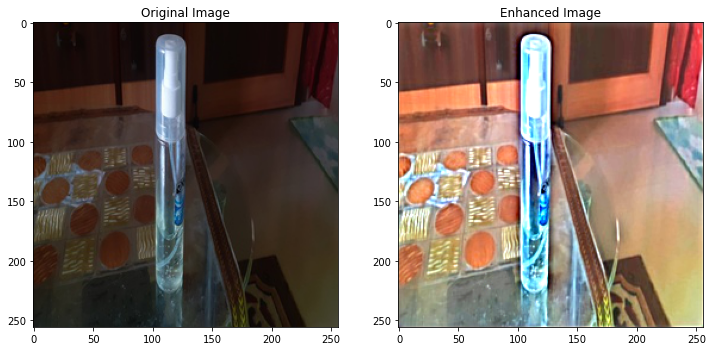

In [13]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

# On 128*128 image

In [14]:
IMAGE_LOC = '/content/Low-Light-Image-Enhancement/assets/original_images/image4.jpg'

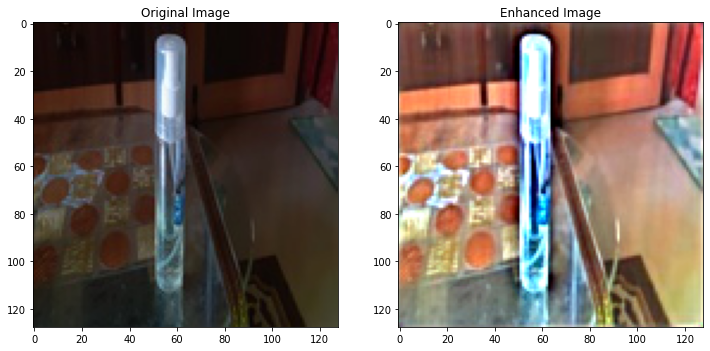

In [15]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

# On 1600*1000

In [16]:
IMAGE_LOC = '/content/Low-Light-Image-Enhancement/assets/original_images/image5.jpg'

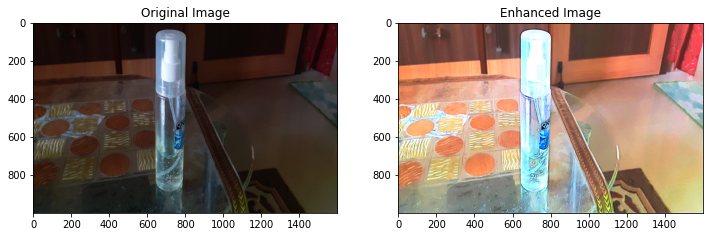

In [17]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

# On 1100*600

In [18]:
IMAGE_LOC = '/content/Low-Light-Image-Enhancement/assets/original_images/image6.JPEG'

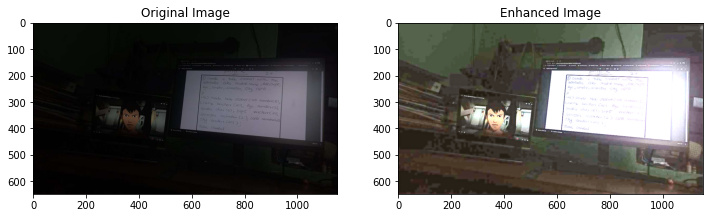

In [19]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

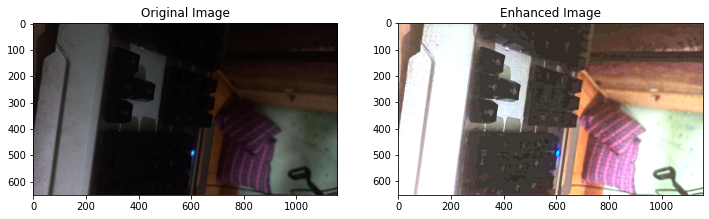

In [20]:
IMAGE_LOC = '/content/Low-Light-Image-Enhancement/assets/original_images/image7.JPEG'
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

LOW LIGHT TONGUE IMAGE

In [21]:
IMAGE_LOC = '/content/Low-Light-Image-Enhancement/assets/original_images/Tongue_image .jpeg'

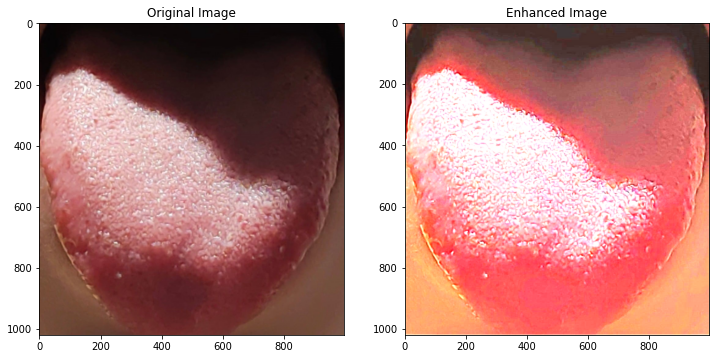

In [22]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)